In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.shape

(309, 16)

In [4]:
df.count()

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
ANXIETY                  309
PEER_PRESSURE            309
CHRONIC DISEASE          309
FATIGUE                  309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
LUNG_CANCER              309
dtype: int64

In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# 1: YES
# 0: NO

condition1 = {"YES": 1, "NO": 0}
condition2 = {"M": 1, "F": 0}
condition3 = {1: 0, 2: 1}

column_names = ["SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]

for i in [df]:
    i["LUNG_CANCER"] = i["LUNG_CANCER"].map(condition1)
    i["GENDER"] = i["GENDER"].map(condition2)
    
    for col in column_names:
        i[col] = i[col].map(condition3)

df.to_csv("survey_lung_cancer_clean.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [7]:
df["LUNG_CANCER"].describe()

count    309.000000
mean       0.873786
std        0.332629
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: LUNG_CANCER, dtype: float64

In [8]:
df["AGE"].describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

In [9]:
df["GENDER"].describe()

count    309.000000
mean       0.524272
std        0.500221
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: GENDER, dtype: float64

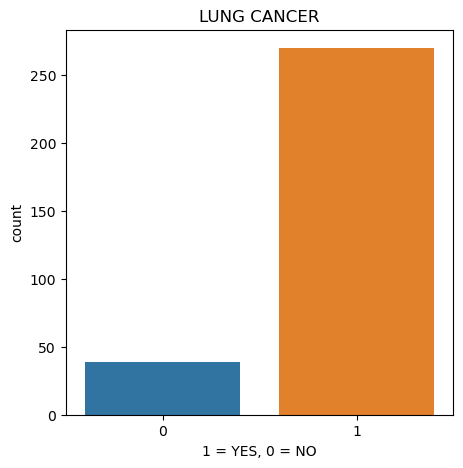

In [10]:
plt.subplots(figsize = (5, 5))
sns.countplot(df, x = "LUNG_CANCER")
plt.title("LUNG CANCER")
plt.xlabel("1 = YES, 0 = NO")
plt.show()

In [11]:
print(f"Number of people diagnosed with lung cancer: {np.sum(df.LUNG_CANCER)}")
print(f"Number of people free of lung cancer: {df.shape[0] - np.sum(df.LUNG_CANCER)}")

Number of people diagnosed with lung cancer: 270
Number of people free of lung cancer: 39


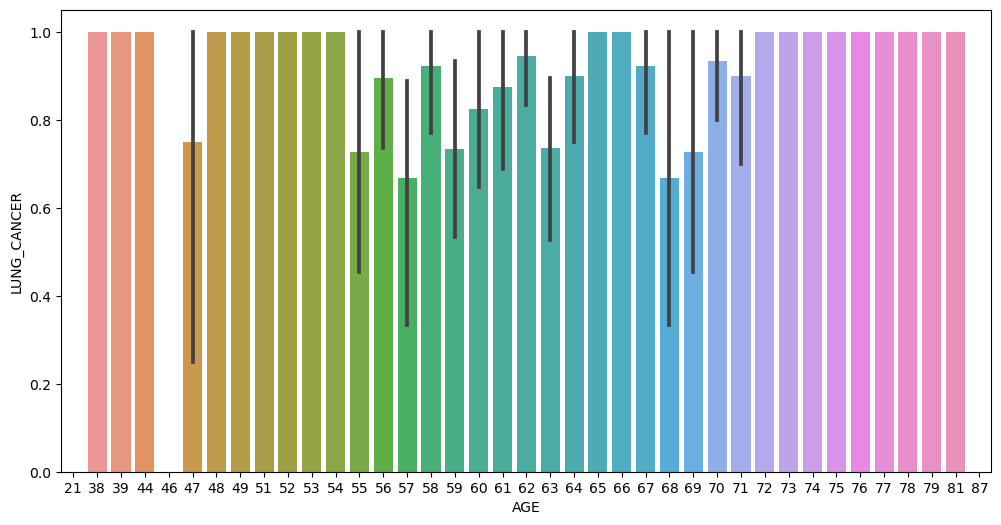

In [12]:
plt.subplots(figsize = (12, 6))
sns.barplot(df, x = "AGE", y = "LUNG_CANCER")
plt.show()

In [13]:
X = df.drop("LUNG_CANCER", axis = 1)
y = df["LUNG_CANCER"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [15]:
clf = LogisticRegression(solver = "lbfgs", max_iter = 160)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=160)

In [16]:
y_predicted = clf.predict(X_test)

In [17]:
confusion_matrix(y_test, y_predicted)

array([[ 5,  2],
       [ 0, 86]], dtype=int64)

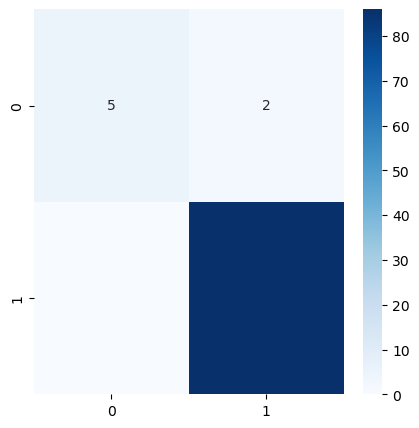

In [18]:
plt.subplots(figsize = (5, 5))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot = True, fmt = "g", cmap = "Blues")
plt.show()

In [19]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



In [20]:
accuracy_score(y_test,y_predicted)

0.978494623655914